In [30]:
#考虑一个用于二分类任务的三层全连接神经网络，结构如下：

#输入层：3 个神经元
#隐藏层 1：4 个神经元，使用 ReLU 激活函数
#隐藏层 2：2 个神经元，使用 ReLU 激活函数
#输出层：1 个神经元，使用 Sigmoid 激活函数

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#sigmoid激活函数
def sigmoid(a):
  return 1 / (1 + np.exp(-a))

In [15]:
#前向传播，求输出y_pred
def forward(w1, w2, w3, b1, b2, b3, x):
  z1 = np.dot(x, w1.T) + b1.T #shape (2,4)
  h1 = np.maximum(0, z1)

  z2 = np.dot(h1, w2.T) + b2.T #shape (2,2)
  h2 = np.maximum(0, z2)

  z3 = np.dot(h2, w3.T) + b3.T #shape (2,1)
  y_pred = sigmoid(z3)
  return z1, z2, h1, h2, y_pred

In [9]:
#求损失函数loss
def compute_loss(y_pred, y_true):
  loss = (y_pred - y_true)**2 /2
  return loss

In [11]:
#反向传播，计算梯度
def backward(y_pred, y_true, h1, h2, z1, z2, w2, w3, x):
  dy = y_pred - y_true #shape (2,1)
  dz3 = dy * y_pred * (1- y_pred) #shape (2,1)
  b3_grad = np.mean(dz3, axis=0, keepdims=True).T
  w3_grad = np.dot(h2.T, dz3).T / h2.shape[0] #shape(1,2)

  dh2 = np.dot(dz3, w3) #shape (2,2)
  dz2 = dh2 * (z2>0)
  b2_grad = np.mean(dz2, axis=0, keepdims=True).T #shape (2,1)
  w2_grad = np.dot(h1.T, dz2).T / h1.shape[0] # shape(2,4)

  dh1 = np.dot(dz2, w2) #shape (2,4)
  dz1 = dh1 * (z1>0)
  b1_grad = np.mean(dz1, axis=0, keepdims=True).T
  w1_grad = np.dot(x.T, dz1).T / x.shape[0] #shape (4,3)
  return w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad

In [19]:
#更新参数
def update_params(w1, w2, w3, b1, b2, b3, w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad, learning_rate):
  w1 -= learning_rate * w1_grad
  w2 -= learning_rate * w2_grad
  w3 -= learning_rate * w3_grad
  b1 -= learning_rate * b1_grad
  b2 -= learning_rate * b2_grad
  b3 -= learning_rate * b3_grad
  return w1, w2, w3, b1, b2, b3

epoch: 1 loss [0.2365] y_pred [0.9  0.97] w1 [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 0.2 0.3 0.1] w2 [0.5 0.4 0.3 0.2 0.1 0.6 0.7 0.8] w3 [0.9 0.8] b1 [0.1 0.2 0.3 0.4] b2 [0.2 0.3] b3 [0.1]
epoch: 101 loss [0.2329] y_pred [0.88 0.96] w1 [0.1  0.2  0.3  0.39 0.49 0.59 0.69 0.79 0.89 0.19 0.29 0.09] w2 [0.49 0.39 0.28 0.19 0.1  0.59 0.68 0.79] w3 [0.88 0.77] b1 [0.09 0.19 0.29 0.39] b2 [0.19 0.29] b3 [0.09]
epoch: 201 loss [0.2276] y_pred [0.86 0.94] w1 [0.09 0.19 0.29 0.39 0.49 0.58 0.69 0.79 0.88 0.19 0.29 0.08] w2 [0.49 0.37 0.26 0.18 0.09 0.58 0.66 0.78] w3 [0.86 0.72] b1 [0.09 0.18 0.28 0.38] b2 [0.18 0.28] b3 [0.07]
epoch: 301 loss [0.2199] y_pred [0.83 0.92] w1 [0.09 0.19 0.28 0.38 0.48 0.57 0.68 0.78 0.88 0.18 0.28 0.07] w2 [0.48 0.35 0.23 0.17 0.08 0.56 0.64 0.78] w3 [0.83 0.67] b1 [0.08 0.17 0.27 0.37] b2 [0.16 0.27] b3 [0.05]
epoch: 401 loss [0.2089] y_pred [0.79 0.89] w1 [0.08 0.18 0.28 0.37 0.47 0.56 0.67 0.77 0.86 0.17 0.27 0.06] w2 [0.47 0.33 0.19 0.16 0.08 0.54 0.61 0.76] w

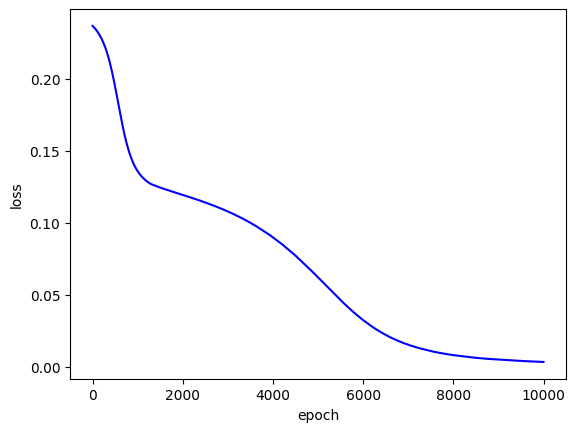

In [20]:
#初始化参数
w1 = np.array([[0.1, 0.2, 0.3],
        [0.4, 0.5, 0.6],
        [0.7, 0.8, 0.9],
        [0.2, 0.3, 0.1]]) #shape (4,3)

b1 = np.array([[0.1],
        [0.2],
        [0.3],
        [0.4]]) #shape (4,1)

w2 = np.array([[0.5, 0.4, 0.3, 0.2],
        [0.1, 0.6, 0.7, 0.8]]) #shape (2,4)

b2 = np.array([[0.2],
        [0.3]]) #shape (2,1)

w3 = np.array([[0.9, 0.8]]) #shape (1,2)

b3 = np.array([[0.1]]) #shape (1,1)

x = np.array([[0.1, 0.2, 0.3],
        [0.4, 0.5, 0.6]])  #shape (2,3)

y_true = np.array([[1],
          [0]]) #shape (2,1)

learning_rate = 0.01
losses = []

epochs = 10000

for epoch in range(epochs):
  z1, z2, h1, h2, y_pred = forward(w1, w2, w3, b1, b2, b3, x)
  loss = np.mean(compute_loss(y_pred, y_true), axis=0, keepdims=True).flatten()
  losses.append(loss)

  w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad = backward(y_pred, y_true, h1, h2, z1, z2, w2, w3, x)
  w1, w2, w3, b1, b2, b3 = update_params(w1, w2, w3, b1, b2, b3, w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad, learning_rate)

  if epoch%100 == 0:
    print("epoch:", epoch +1,
      "loss", np.round(loss, 4),
      "y_pred", np.round(y_pred.flatten(), 2),
      "w1", np.round(w1.flatten(), 2),
      "w2", np.round(w2.flatten(), 2),
      "w3", np.round(w3.flatten(), 2),
      "b1", np.round(b1.flatten(), 2),
      "b2", np.round(b2.flatten(), 2),
      "b3", np.round(b3.flatten(), 2)
      )

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()


In [21]:
import torch
import matplotlib.pyplot as plt

In [26]:
#前向传播，求输出y_pred
def th_forward(w1, w2, w3, b1, b2, b3, x):
  z1 = torch.matmul(x, w1.T) + b1.T #shape (2,4)
  h1 = torch.relu(z1)

  z2 = torch.matmul(h1, w2.T) + b2.T #shape (2,2)
  h2 = torch.relu(z2)

  z3 = torch.matmul(h2, w3.T) + b3.T #shape (2,1)
  y_pred = torch.sigmoid(z3)
  return z1, z2, h1, h2, y_pred

In [24]:
#求损失函数loss
def th_compute_loss(y_pred, y_true):
  loss = (y_pred - y_true)**2 /2
  return loss

epoch: 1 loss: 0.2365 y_pred: [0.9  0.97] w1 [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 0.2 0.3 0.1] w2 [0.5 0.4 0.3 0.2 0.1 0.6 0.7 0.8] w3 [0.9 0.8] b1 [0.1 0.2 0.3 0.4] b2 [0.2 0.3] b3 [0.1]
epoch: 101 loss: 0.2329 y_pred: [0.88 0.96] w1 [0.1  0.2  0.3  0.39 0.49 0.59 0.69 0.79 0.89 0.19 0.29 0.09] w2 [0.49 0.39 0.28 0.19 0.1  0.59 0.68 0.79] w3 [0.88 0.77] b1 [0.09 0.19 0.29 0.39] b2 [0.19 0.29] b3 [0.09]
epoch: 201 loss: 0.2276 y_pred: [0.86 0.94] w1 [0.09 0.19 0.29 0.39 0.49 0.58 0.69 0.79 0.88 0.19 0.29 0.08] w2 [0.49 0.37 0.26 0.18 0.09 0.58 0.66 0.78] w3 [0.86 0.72] b1 [0.09 0.18 0.28 0.38] b2 [0.18 0.28] b3 [0.07]
epoch: 301 loss: 0.2199 y_pred: [0.83 0.92] w1 [0.09 0.19 0.28 0.38 0.48 0.57 0.68 0.78 0.88 0.18 0.28 0.07] w2 [0.48 0.35 0.23 0.17 0.08 0.56 0.64 0.78] w3 [0.83 0.67] b1 [0.08 0.17 0.27 0.37] b2 [0.16 0.27] b3 [0.05]
epoch: 401 loss: 0.2089 y_pred: [0.79 0.89] w1 [0.08 0.18 0.28 0.37 0.47 0.56 0.67 0.77 0.86 0.17 0.27 0.06] w2 [0.47 0.33 0.19 0.16 0.08 0.54 0.61 0.76] w

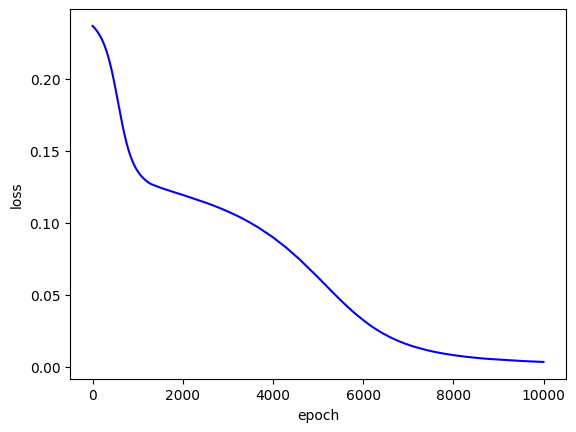

In [29]:
#初始化参数
w1 = torch.tensor([[0.1, 0.2, 0.3],
          [0.4, 0.5, 0.6],
          [0.7, 0.8, 0.9],
          [0.2, 0.3, 0.1]],requires_grad=True) #shape (4,3)

b1 = torch.tensor([[0.1],
          [0.2],
          [0.3],
          [0.4]],requires_grad=True) #shape (4,1)

w2 = torch.tensor([[0.5, 0.4, 0.3, 0.2],
          [0.1, 0.6, 0.7, 0.8]],requires_grad=True) #shape (2,4)

b2 = torch.tensor([[0.2],
          [0.3]],requires_grad=True) #shape (2,1)

w3 = torch.tensor([[0.9, 0.8]],requires_grad=True) #shape (1,2)

b3 = torch.tensor([[0.1]],requires_grad=True) #shape (1,1)

x = torch.tensor([[0.1, 0.2, 0.3],
        [0.4, 0.5, 0.6]])  #shape (2,3)

y_true = torch.tensor([[1],
            [0]]) #shape (2,1)

learning_rate = 0.01
losses = []

epochs = 10000

for epoch in range(epochs):
  z1, z2, h1, h2, y_pred = th_forward(w1, w2, w3, b1, b2, b3, x)
  loss = th_compute_loss(y_pred, y_true).mean().flatten()
  losses.append(loss.item())

  if w1.grad is not None:
    w1.grad.zero_()
    w2.grad.zero_()
    w3.grad.zero_()
    b1.grad.zero_()
    b2.grad.zero_()
    b3.grad.zero_()

  loss.backward()

  with torch.no_grad():
    w1 -= learning_rate * w1.grad
    w2 -= learning_rate * w2.grad
    w3 -= learning_rate * w3.grad
    b1 -= learning_rate * b1.grad
    b2 -= learning_rate * b2.grad
    b3 -= learning_rate * b3.grad

  if epoch%100 == 0:
    print(f"epoch: {epoch +1}",
      f"loss: {loss.item():.4f}",
      f"y_pred: {y_pred.flatten().detach().numpy().round(2)}",
      f"w1 {w1.flatten().detach().numpy().round(2)}",
      f"w2 {w2.flatten().detach().numpy().round(2)}",
      f"w3 {w3.flatten().detach().numpy().round(2)}",
      f"b1 {b1.flatten().detach().numpy().round(2)}",
      f"b2 {b2.flatten().detach().numpy().round(2)}",
      f"b3 {b3.flatten().detach().numpy().round(2)}"
      )

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()